# <center> Práctica final 1: NumPy y SciPy </center>

## <font color='purple'>**Ejercicio 1**</font>

Utilice los datos recopilados por una estación sismológica sobre la aceleración vertical causada por un sismo en $\mathrm{nm/s^2}$ y las funciones de las bibliotecas SciPy y NumPy para lo siguiente:

* Importar los datos utilizando NumPy y guardarlos como números de punto flotante.
* Graficar los datos de tiempo contra la aceleración. Para graficar se provee la siguiente plantilla con el código de matplotlib:
```
import matplotlib.pyplot as plt
plt.plot(,) #Valores x, valores y
plt.show()
```
* Encontrar el valor del *peak* de aceleración. Este corresponde al valor absoluto más alto de la aceleración en el período de tiempo dado.
* Obtener la transformada de Fourier y utilizar la plantilla de matplotlib para obtener el espectro de amplitud y frecuencia. Considere que el instrumento registra 100 muestras por segundo. <!--Lo mismo del audio del pajarito-->
* Sabiendo que el ruido sísmico casi siempre es menor a 1 Hz y que un tipo de filtro adecuado en sismología es el Butterworth, implementar un filtro que corrija los posibles efectos del ruido. Utilice el orden de filtro más pequeño posible y que sea efectivo para atenuar el ruido. <!--Probar en orden, primero con el 1, si no sirve el 2-->
* Obtener y graficar nuevamente la transformada de Fourier para ver el resultado filtrado.

In [1]:
#primero se cargan los datos de aceleracionvertical.csv al notebook.

#Para Importar los datos utilizando NumPy y guardarlos como números de punto flotante.
import numpy as np
datosacele = np.genfromtxt('aceleracionVertical.csv', dtype=float, delimiter=',', names=True)
        #Parsear es cambiar el tipo de dato, o adaptar a que sean cierto tipo de dato en especifico. En este caso se especifica que de punto flotante/float type.
        #Se elije genfromtxt names=true para tener los encabezados.
datosacele

array([(1.000e+00, -143.), (2.000e+00, -114.), (3.000e+00, 4609.), ...,
       (3.046e+03, 1721.), (3.047e+03, 5358.), (3.048e+03, 5388.)],
      dtype=[('tiempo', '<f8'), ('aceleracion_vertical', '<f8')])

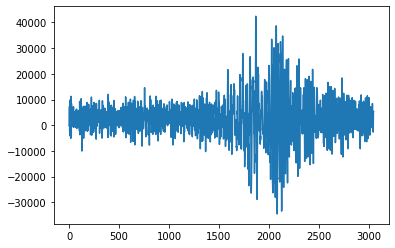

In [2]:
# Graficar los datos de tiempo contra la aceleración. Para graficar se provee la siguiente plantilla con el código de matplotlib:
import matplotlib.pyplot as plt
plt.plot(datosacele['tiempo'],datosacele['aceleracion_vertical']) #Valores x, valores y
plt.show()

In [5]:
#Encontrar el valor del peak de aceleración. Este corresponde al valor absoluto más alto de la aceleración en el período de tiempo dado.
ABSacele = np.where(datosacele['aceleracion_vertical'] > 0, datosacele['aceleracion_vertical']*(-1), datosacele['aceleracion_vertical'])
                #Tomo todas las aceleraciones, busco las cuales son mayores a 0, las vuelvo negativas y las que ya eran negativas, las dejo asi.
                # Lo anterior lo hago en otro objeto para no reescribir los datos de la original.
ValorPeak = (-1)*np.amin(ABSacele) #Tomo el valor minimo del arreglo en valor absoluto de la aceleracion y lo vuelvo positivo.
print('Este es el valor peak usando np.where y np.amin:', ValorPeak, 'nm/s2')

#Tambien se puede usar la funcion de valor absoluto y maximo de numpy
AbsAceleNumpy = np.absolute(datosacele['aceleracion_vertical'])
AbsAceleNumpyMax = np.amax(AbsAceleNumpy) 
print('Este es el valor del peak usando np.absolute y np.max:',AbsAceleNumpyMax, 'nm/s2')

Este es el valor peak usando np.where y np.amin: 42428.0 nm/s2
Este es el valor del peak usando np.absolute y np.max: 42428.0 nm/s2


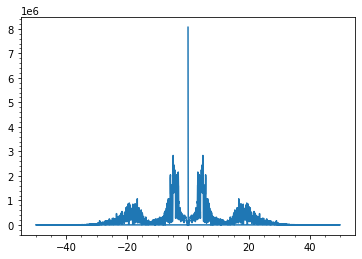

In [7]:
#Obtener la transformada de Fourier y utilizar la plantilla de matplotlib para obtener el espectro de amplitud y frecuencia.
# Considere que el instrumento registra 100 muestras por segundo.

# Podemos aplicar una transformada de Fourier para ver el dominio de la frecuencia. Esto lo logramos con el módulo scipy.fft.
from scipy.fft import fft, fftfreq

yf = fft(datosacele['aceleracion_vertical']) #Transforma los datos del eje Y en una amplitud.
xf = fftfreq(datosacele.shape[0], 1/100) #Transforma los datos a valores de frecuencia. (el numero de elementos del eje x, valores del eje x). Samplerate son las 100 muestras = 1/samplerate

plt.plot(xf, np.abs(yf)) #Aqui vamos a ver la señal en el dominio de la frecuencia.
plt.minorticks_on()
plt.show()

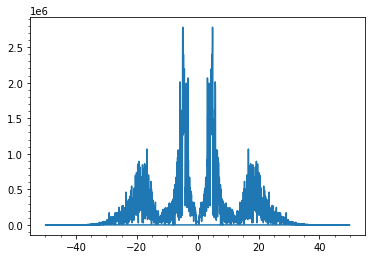

In [8]:
#Sabiendo que el ruido sísmico casi siempre es menor a 1 Hz y que un tipo de filtro adecuado en sismología es el Butterworth, 
#implementar un filtro que corrija los posibles efectos del ruido.
#Utilice el orden de filtro más pequeño posible y que sea efectivo para atenuar el ruido.

from scipy.signal import butter,sosfilt

sos = butter(1,1,'hp',output='sos', fs=100) #Filtro paso alto de orden 2, Butterworth. fs=100 muestras
                      #(orden del filtro/lo que quiero atenuar, frecuencia de corte/frecuencia hasta donde se aplica el filtro, tipo de filtro, el formato de paso, samplerate)
filtrado = sosfilt(sos, datosacele['aceleracion_vertical'])
yff = fft(filtrado)

plt.plot(xf, np.abs(yff))
plt.minorticks_on()
plt.show() #Se grafican los datos ya filtrados.

## <font color='purple'>**Ejercicio 2**</font>

Como parte de sus labores, usted quiere hacer un estudio para evaluar las ganancias de cuatro productos con fórmulas distintas 1, 2, 3 y 4. Particularmente, usted quiere:

* Determinar un método que le permita averiguar las ganancias según la población de la ciudad en la que se venden los productos. Como no está seguro del método, va a comparar un método de interpolación y uno de regresión.
* Con ambos métodos saber las ganancias que obtendría en una ciudad de 17500 habitantes, en la cual se desea comenzar a vender los productos.
* Conocer las estadísticas generales de las ganancias que obtuvo.
* Cuantificar de alguna manera si la fórmula vendida tiene un impacto en las ganancias reportadas. Para ello quiere realizar un ANOVA, pero tiene que comprobar primero la normalidad de los datos.

Los datos los puede encontrar en un archivo llamado ganancias.csv. Si lo desea, puede utilizar las plantillas de matplotlib para graficar sus resultados.

**Pistas:** 

- linregress(), normaltest() y kruskal() son funciones de SciPy que le pueden ayudar a resolver este problema.
- El test de Kruskal-Wallis es similar al ANOVA pero no paramétrico; es decir, no se necesita suponer que los datos son normales. <!--Ya que anova solo funciona en datos parametrizados-->
- Observe que los datos están ordenados en términos de la fórmulas (primero están las ciudades que usaron la 1), por lo que puede usar funciones de NumPy vistas para separar los datos de cada fórmula.



In [9]:
#Determinar un método que le permita averiguar las ganancias según la población de la ciudad en la que se venden los productos. 
#Como no está seguro del método, va a comparar un método de interpolación y uno de regresión.

import numpy as np
datos = np.genfromtxt('ganancias.csv', delimiter=',', names= True)

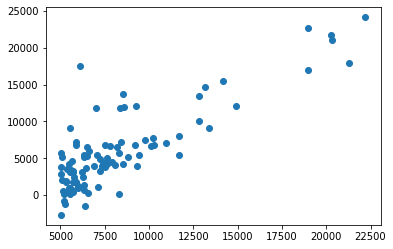

In [10]:
import matplotlib.pyplot as plt
plt.plot(datos['Poblacion'], datos['Ganancias'], 'o')
plt.show()

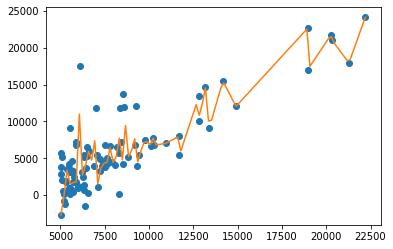

In [11]:
from scipy.interpolate import interp1d

f = interp1d(datos['Poblacion'], datos['Ganancias'])
x = np.linspace(datos['Poblacion'].min(), datos['Poblacion'].max(),100)

plt.plot(datos['Poblacion'], datos['Ganancias'], 'o', x,f(x), '-')
plt.show()

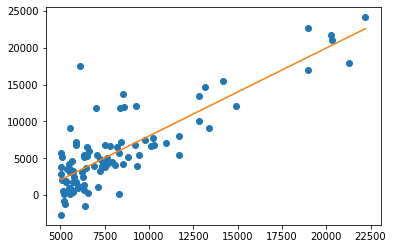

In [12]:
from scipy import stats

m, b, r, p, se = stats.linregress(datos['Poblacion'], datos['Ganancias'])
ganancias_modelo = m*x+b
plt.plot(datos['Poblacion'], datos['Ganancias'], 'o', x,ganancias_modelo, '-')
plt.show()

In [13]:
print('Modelo de interpolacion: ', f(17500))
print('Modelo de regresion: ', m*17500+b)

Modelo de interpolacion:  18849.572950210553
Modelo de regresion:  16982.348346908886


In [14]:
print(stats.describe(datos['Ganancias']))
#Se ve que algun producto genero perdidas

DescribeResult(nobs=97, minmax=(-2680.7, 24147.0), mean=5839.135051546392, variance=30362990.121429425, skewness=1.4111112833185921, kurtosis=1.8106999773946244)


In [15]:
print(stats.normaltest(datos['Ganancias']))

# pvalue es muy pequeño, por lo que no se puede suponer que esos datos son normales, por lo que no se puede aplicar al funcion de anova
# ya que esa funcion supone qeu los datos son normales
# por eso hay que usar el kruskal
# por eso hay que separar los datos de las diferentes formular, 1. averiguando en que indices estaban los datos
# y luego hacer sliciing
# 2. Otra cosa que se podia hacer esa np.unique, aqui yo paso los datos de la columna especifica y lo que retorna es cuales son los datos que hay 
# (cuales son los diferentes datos que hay) y si yo pido el inidce, me dice los indices

NormaltestResult(statistic=29.86211515547305, pvalue=3.2773595181061103e-07)


In [16]:
np.where(datos['Formula'] == 1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),)

In [18]:
np.unique(datos['Formula'], return_index=True)

(array([1., 2., 3., 4.]), array([ 0, 23, 47, 71]))

In [19]:
F1 = datos['Ganancias'][:23]
F2 = datos['Ganancias'][23:47]
F3 = datos['Ganancias'][47:71]
F4 = datos['Ganancias'][71:]

In [21]:
stats.kruskal(F1, F2, F3, F4)

#Esto indica que si hay diferencias entre las distintas formulas aplicadas

KruskalResult(statistic=18.927440124068823, pvalue=0.00028300770875699547)